# **Lane-Endem**
## Tratamiento numérico

Tópicos Avanzados 2\
Ricardo  Quispe

Ecuación de Lane-Endem
$$ \frac{d^2 \theta}{d\xi^2} + \frac{2}{\xi} \frac{d\theta}{d\xi} = \theta^n $$



$$\xi = \frac{r}{r_n}$$

$$ r_n = \left[ \frac{(n+1)P_c}{4\pi G \rho_c^2}  \right]^{1/2} $$

$$ \theta (\xi)|_{\xi=0} = 1 , \\ \theta' (\xi)|_{\xi=0} = 0$$

Soluciones analíticas:

$$ \theta_0(\xi) = 1 - \frac{\xi^2}{6}$$

$$ \theta_1(\xi) = \frac{sen(\xi)}{\xi} $$

$$x_1(0) = 1 \quad ; \quad  x_2(0) = 0$$

$$\frac{d}{d\xi}\begin{pmatrix} x_1\\ x_2 \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -1 & \frac{-2}{\xi}\end{pmatrix} \begin{pmatrix} x_1^n\\x_2\end{pmatrix}$$

## Runge Kutta

$$ \frac{dy}{dt} = f(y,t) $$
$$y(t=0) = y_0$$

$v_0=y_0$

$v_{n+1}=v_n+\frac{k}{6}(q_1+2q_2+2q_3+q_4)$

$q1=f(u,t)$

$q2=f(u+dt*q_1/2,t+dt/2)$

$q3=f(u+dt*q_2/2,t+dt/2)$

$q4=f(u+dt*q_3,t+dt)$



In [30]:
import numpy as np
import matplotlib.pyplot as plt
#
n=0
t=0.001
xinc=1
vinc=0
#u=np.array([xinc,vinc])
#

def F(u,t):
        # array(x2, -2/ξ x2-x1^n)
        return np.array([u[1], -(2/t)*u[1]-u[0]**n])

u=np.array([xinc,vinc])

tsol=[t]
rsol=[u[0]]
vsol=[u[1]]
tfin=4
dt=0.001
while t<tfin:
    k1=F(u,t)
    k2=F(u+dt*k1/2,t+dt/2)
    k3=F(u+dt*k2/2,t+dt/2)
    k4=F(u+dt*k3,t+dt)
    u=u+(k1+2*k2+2*k3+k4)*dt/6
    t=t+dt
    rsol.append(u[0])
    vsol.append(u[1])
    tsol.append(t)  

In [55]:
def sol_le(n,t_ini,t_fin,h,ξ0,dξ0):
    import numpy as np
    import matplotlib.pyplot as plt
    #
    t=t_ini
    xinc=ξ0 
    vinc=dξ0
    #u=np.array([xinc,vinc])
    #

    def F(u,t):
            # array(x2, -2/ξ x2-x1^n)
            return np.array([u[1], -(2/t)*u[1]-u[0]**n])

    u=np.array([xinc,vinc])

    tsol=[t]
    rsol=[u[0]]
    vsol=[u[1]]
    tfin=t_fin
    dt=h
    while t<tfin:
        k1=F(u,t)
        k2=F(u+dt*k1/2,t+dt/2)
        k3=F(u+dt*k2/2,t+dt/2)
        k4=F(u+dt*k3,t+dt)
        u=u+(k1+2*k2+2*k3+k4)*dt/6
        t=t+dt
        rsol.append(u[0])
        vsol.append(u[1])
        tsol.append(t)
    return(np.array([tsol,rsol,vsol]))
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#
n=1
t=0.001
xinc=1
vinc=0
#u=np.array([xinc,vinc])
#

def F(u,t):
        # array(x2, -2/ξ x2-x1^n)
        return np.array([u[1], -(2/t)*u[1]-u[0]**n])

u=np.array([xinc,vinc])

tsol1=[t]
rsol1=[u[0]]
vsol1=[u[1]]
tfin=4
dt=0.001
while t<tfin:
    k1=F(u,t)
    k2=F(u+dt*k1/2,t+dt/2)
    k3=F(u+dt*k2/2,t+dt/2)
    k4=F(u+dt*k3,t+dt)
    u=u+(k1+2*k2+2*k3+k4)*dt/6
    t=t+dt
    rsol1.append(u[0])
    vsol1.append(u[1])
    tsol1.append(t)  

Cambio de variable:

$$x_1= \theta \quad ; \quad x_2= \theta'$$

Diferenciando $x_1$ y $x_2$:
$$ x_1'=\theta' = x_2 \\ x_2' = -\frac{2}{\xi} x_2 - x_1^n $$



<function matplotlib.pyplot.show(*args, **kw)>

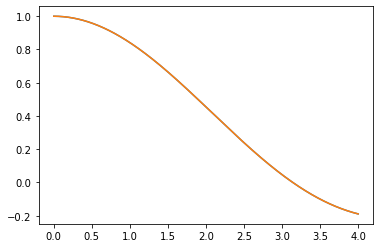

In [2]:
plt.plot(tsol1,rsol1)
plt.plot(tsol1, np.sin(np.array(tsol1))/np.array(tsol1))
plt.show

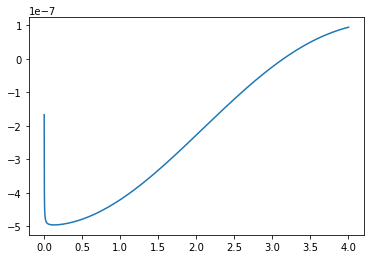

In [3]:
plt.plot(tsol1, -np.array(rsol1)+np.sin(np.array(tsol1))/np.array(tsol1))

<function matplotlib.pyplot.show(*args, **kw)>

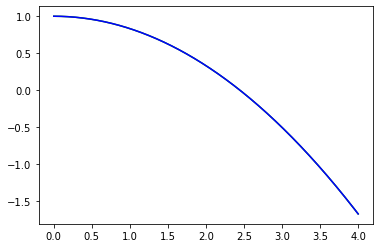

In [33]:
plt.plot(tsol,rsol,'g')
plt.plot(tsol,(1-np.array(tsol)**2/6),'b')
plt.show

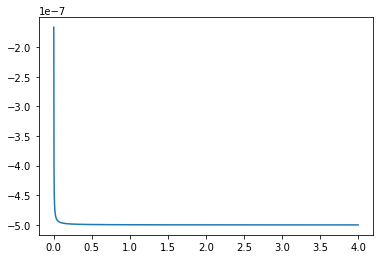

In [39]:
plt.plot(tsol,-np.array(rsol)+(1-np.array(tsol)**2/6))

In [176]:
#n , tini,tfin,h,ξ0,dξ0
le_n3=sol_le(3,0.001,7,0.001,1,0)
le_n3

array([[ 1.00000000e-03,  2.00000000e-03,  3.00000000e-03, ...,
         6.99800000e+00,  6.99900000e+00,  7.00000000e+00],
       [ 1.00000000e+00,  9.99999648e-01,  9.99998876e-01, ...,
        -4.22993941e-03, -4.27114556e-03, -4.31233993e-03],
       [ 0.00000000e+00, -5.74073866e-04, -9.58640289e-04, ...,
        -4.12120333e-02, -4.12002575e-02, -4.11884867e-02]])

In [177]:
print(len(le_n3[0]), "|", len(ξ3))

7000 | 7000


In [202]:
ξ3=le_n3[0]
θ3=le_n3[1]
dθ3=le_n3[2]

In [179]:
le_n3

array([[ 1.00000000e-03,  2.00000000e-03,  3.00000000e-03, ...,
         6.99800000e+00,  6.99900000e+00,  7.00000000e+00],
       [ 1.00000000e+00,  9.99999648e-01,  9.99998876e-01, ...,
        -4.22993941e-03, -4.27114556e-03, -4.31233993e-03],
       [ 0.00000000e+00, -5.74073866e-04, -9.58640289e-04, ...,
        -4.12120333e-02, -4.12002575e-02, -4.11884867e-02]])

Text(0.5, 1.0, 'LE con n=3')

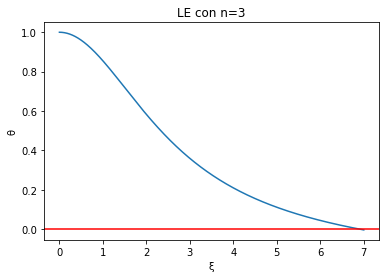

In [180]:
plt.plot(ξ3,θ3)
plt.xlabel('ξ')
plt.ylabel('θ')
plt.axhline(y=0, color='r',linestyle='-')
plt.title('LE con n=3')

In [181]:
len(le_n3[1])

7000

# Hallando $\xi_3$

Este valor se halla cuando:

$$\theta(\xi)=0 \Rightarrow \xi=\xi_3$$ para el caso de $n=3$

In [182]:
import numpy as np
def find_nearest(array, value):
    idx = (np.abs(array - value)).argmin()
    #le sumamos "value" para obtener el valor de ese número en esa fila,
    #y no la diferencia
    return array[idx+value] 

In [184]:
θ3[6890:6900]

array([ 2.48219738e-04,  2.05724094e-04,  1.63240779e-04,  1.20769790e-04,
        7.83111194e-05,  3.58647632e-05, -6.56928446e-06, -4.89910288e-05,
       -9.14004752e-05, -1.33797629e-04])

In [183]:
#el valor más cercano a 0 de θ
find_nearest(θ3,0)

-6.569284461539601e-06

In [131]:
len(le_n3[1])

7000

In [161]:
min_n3=np.where(θ3==find_nearest(θ3,0))
min_n3[0]

array([6896], dtype=int64)

In [203]:
ξ_3=ξ3[min_n3[0][0]]
ξ_3

6.897000000000638

$$\xi_3 = 6.897000000000638$$

Por lo que ahora podemos calcular el radio de la estrella
$$ r_\star = \alpha \xi_3$$

$$P_c = \frac{1}{4\pi (n+1)[\theta'(\xi_3)]}\frac{GM_\star^2}{R_\star^4}$$

In [233]:
M_sun=1.9891e30 #Kg
R_sun=6.955e8 #m
G=6.67e-11
n=3
P_c= (G*M_sun**2)/(4*np.pi*(n+1)*(dθ3[6896])**2*R_sun**4)
P_c

1.2464581551986666e+16

$$P_c = 1.25x10^{16} N.m^{-2}$$

$$\rho_c=-\left[\frac{\xi_3 }{3\theta'(\xi_3)}\right]\bar{\rho}$$

$$\bar\rho = \frac{M}{\frac{4}{3}\pi R^3}$$

In [234]:
ρ_m=M_sun/(4/3 * np.pi *R_sun**3)
ρ_c=-(ξ_3/(3*dθ3[6896]))*ρ_m
ρ_c

76482.85480067521

$$\rho_c =7.65x10^4 \quad kg .m^{-3}$$

$$ <\rho>=\frac{M_\odot}{\frac{4}{3}\pi R_\odot^3}$$

$$T_c=\frac{P_c\mu m_H}{<\rho>k}$$

https://web.njit.edu/~gary/320/Lecture22.html#:~:text=Again%2C%20for%20the%20Sun%20(at,0.01%2C%20so%20m%20~%200.6.&text=Tc%20%3D%20Pcmm,enough%20to%20permit%20nuclear%20fusion.

In [228]:
ρ_m

1411.4860981657316

In [235]:
k=1.38e-23 #J/K

μ=0.6
T_c=(P_c*μ*mH)/(ρ_m*k)
T_c

641194418.7874212

$$T_c=6.412 x10^8 K$$

$$T_c=\frac{G m_H M_\odot}{k R_\odot}$$

In [238]:
#β=0.003
#μ=0.6
#T_c=19.72*β*μ*1e6 #Kelvin
#T_c 
mH=1.67e-27 #Kg
T_c=G*mH*M_sun/(k*R_sun)
T_c

23084618.49988018

$$T_c=2.3x10^7 K$$

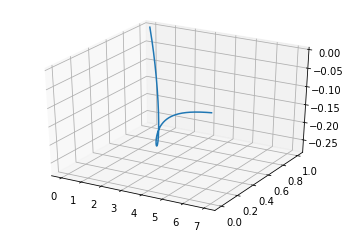

In [239]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(ξ3,θ3,dθ3)
plt.show()

In [8]:
rn

70285396799.74387

In [64]:
100000

100000

In [66]:
G=6.67e-11 *(1e5) * (100)**2/(1000)**2
G #dyna.cm^2/gm^2

6.67e-08

$$\alpha =\left[\frac{P_c(n+1)}{4\pi G\rho_c^2}\right]^{\frac{1}{2}}$$


$[\alpha] = \frac{dyne. gm^2 .cm^6}{cm^2. dyne. cm^2. gm^2}$

In [243]:
ξ_3*rn

695500000.0000001

## ploteando $\rho$ vs $r$

Text(0, 0.5, 'ρ = $ρ_c$ $θ^n$')

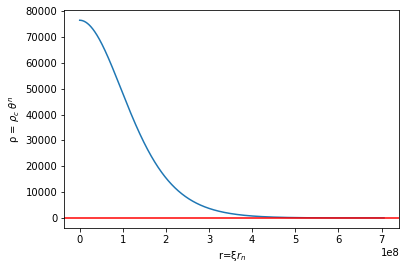

In [248]:
#Pc=2.65e15 *10# el *10 es la conversión de pascales a barias
#G=6.67e-8 #
#ρc=150 #g/cm3 #16e4 # Kg/m3
n=3
rn=( ((n+1)*P_c)/(4*np.pi*G*ρ_c**2) )**(1/2)
plt.plot(np.array(ξ3*rn),(np.array(θ3)**n)*ρ_c)
plt.axhline(y=0, color='r',linestyle='-')
plt.xlabel('r=ξ$r_n$')
plt.ylabel('ρ = $ρ_c$ $θ^n$')

In [260]:
ρ=(np.array(θ3)**n)*ρ_c
ρ

array([ 7.64828548e+04,  7.64827741e+04,  7.64825969e+04, ...,
       -5.78850657e-03, -5.95932686e-03, -6.13342492e-03])

<function matplotlib.pyplot.show(*args, **kw)>

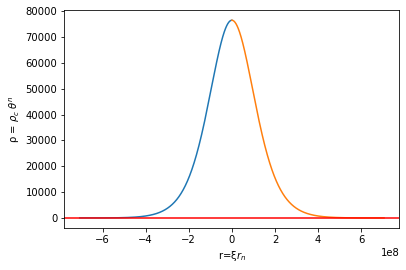

In [262]:
plt.plot(-np.array(ξ3*rn),(np.array(θ3)**n)*ρ_c)
plt.plot(np.array(ξ3*rn),(np.array(θ3)**n)*ρ_c)
plt.axhline(y=0, color='r',linestyle='-')
plt.xlabel('r=ξ$r_n$')
plt.ylabel('ρ = $ρ_c$ $θ^n$')
plt.show

## ploteando presión vs r

$$P=P_c \theta^{1+n}$$

<function matplotlib.pyplot.show(*args, **kw)>

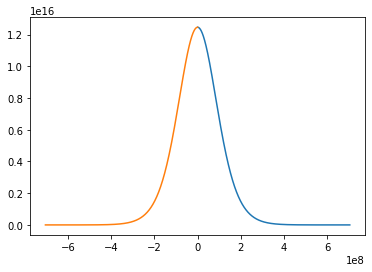

In [276]:
plt.plot(np.array(ξ3)*rn,P_c*θ3**(1+n))
plt.plot(-np.array(ξ3)*rn,P_c*θ3**(1+n))
plt.show

## Temperatura vs r

$$T(r) = T_c - \frac{1}{8ac}\frac{\bar k \rho_c^2}{T_c^3}\epsilon_cr^2$$

In [278]:
T_c

23084618.49988018

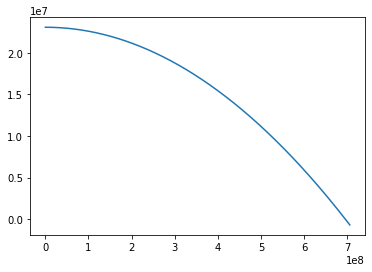

In [277]:
rr=np.array(ξ3)*rn
T_arr= T_c*(1-(rr/R_sun)**2)

plt.plot(rr,T_arr)

$$P=K\rho^{1+\frac{1}{n}}$$

$$P=\rho^{\frac{7}{3}+\frac{1}{n}}$$

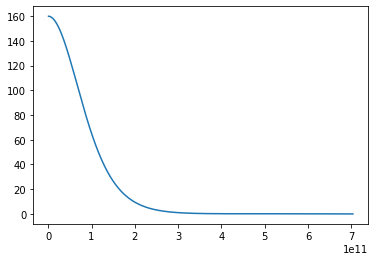

In [11]:
radio=np.array(xsol)*ρc
radio[1:-174]

array([ 1.59994371e+02,  1.59982016e+02,  1.59963850e+02,  1.59940160e+02,
        1.59911048e+02,  1.59876563e+02,  1.59836732e+02,  1.59791574e+02,
        1.59741105e+02,  1.59685336e+02,  1.59624283e+02,  1.59557957e+02,
        1.59486373e+02,  1.59409543e+02,  1.59327483e+02,  1.59240208e+02,
        1.59147734e+02,  1.59050077e+02,  1.58947255e+02,  1.58839287e+02,
        1.58726192e+02,  1.58607989e+02,  1.58484701e+02,  1.58356349e+02,
        1.58222954e+02,  1.58084542e+02,  1.57941135e+02,  1.57792759e+02,
        1.57639440e+02,  1.57481205e+02,  1.57318080e+02,  1.57150093e+02,
        1.56977275e+02,  1.56799653e+02,  1.56617259e+02,  1.56430124e+02,
        1.56238279e+02,  1.56041756e+02,  1.55840590e+02,  1.55634813e+02,
        1.55424460e+02,  1.55209566e+02,  1.54990167e+02,  1.54766298e+02,
        1.54537998e+02,  1.54305303e+02,  1.54068251e+02,  1.53826881e+02,
        1.53581232e+02,  1.53331343e+02,  1.53077255e+02,  1.52819008e+02,
        1.52556643e+02,  

In [12]:
asign=np.sign(radio)


Coeficiente de precisión:

$$ Q(t,k) = \frac{v(t,k)-v(t,k/2)}{v(t,k/2)-v(t,k/4)} $$